# Average delay time in Brussels, weekend vs weekday and see if there's correlation with number of travelers

In [4]:
import src.data_processing.data as data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 5000)


In [9]:
stations = data.stations
travelers = data.travelers
trips = data.full_trips
for x in trips[['Delay time']]:
    trips.loc[trips[x] > 85000,x] = np.nan
trips.sort_values(by = "Delay time", ascending = False)
travelers.sort_values(by = "sum", ascending = False).head(5)

,Unnamed: 0,Station,week,saturday,sunday,sum
88,88,brussel-noord/bruxelles-nord,63779.0,25820.0,21621.0,111220.0
87,87,brussel-zuid/bruxelles-midi,59670.0,23733.0,24534.0,107937.0
83,83,brussel-centraal/bruxelles-central,60706.0,23336.0,22027.0,106069.0
197,197,gent-sint-pieters,55325.0,25486.0,20416.0,101227.0
16,16,antwerpen-centraal,39628.0,23918.0,18553.0,82099.0


In [10]:
trips = trips.merge(travelers[["Station", "sum"]], left_on=["Name of the stop"], right_on=["Station"], how="left")
trips = trips[(trips["Name of the stop"] == "brussel-noord/bruxelles-nord") | (trips["Name of the stop"] == "brussel-zuid/bruxelles-midi") | (trips["Name of the stop"] == "brussel-centraal/bruxelles-central")]

trips = trips.sort_values(by = ["Station", "Time of real departure"])
trips

,Unnamed: 0,Date of departure,Train number,Relation,Railway operators,Railway of departure,Time of real arrival,Time of real departure,Time of planned arrival,Time of planned departure,Direction of relation,Name of the stop,Railway of arrival,Date of planned arrival,Date of planned departure,Date of real arrival,Date of real departure,Delay time,Station,sum
159387,14963,2020-09-20,1974,L B1-2,SNCB/NMBS,0/3,2020-09-20 00:46:41,2020-09-20 00:47:39,2020-09-20 00:45:00,2020-09-20 00:46:00,L B1-2: NIVELLES -> BRUSSEL-NOORD,brussel-centraal/bruxelles-central,0/3,2020-09-20,2020-09-20,2020-09-20,2020-09-20,101.0,brussel-centraal/bruxelles-central,106069.0
148701,4277,2020-09-20,3745,IC 06-2,SNCB/NMBS,0/2,2020-09-20 00:46:57,2020-09-20 00:48:12,2020-09-20 00:47:00,2020-09-20 00:48:00,IC 06-2: BRUSSELS AIRPORT - ZAVENTEM -> MONS,brussel-centraal/bruxelles-central,0/2,2020-09-20,2020-09-20,2020-09-20,2020-09-20,0.0,brussel-centraal/bruxelles-central,106069.0
149969,5545,2020-09-20,1995,L B1-2,SNCB/NMBS,0/2,2020-09-20 01:14:04,2020-09-20 01:15:08,2020-09-20 01:13:00,2020-09-20 01:14:00,L B1-2: BRUSSEL-NOORD -> NIVELLES,brussel-centraal/bruxelles-central,0/2,2020-09-20,2020-09-20,2020-09-20,2020-09-20,64.0,brussel-centraal/bruxelles-central,106069.0
166292,21868,2020-09-20,1903,IC 06-1,SNCB/NMBS,0/3,2020-09-20 04:55:08,2020-09-20 04:55:57,2020-09-20 04:55:00,2020-09-20 04:56:00,IC 06-1: TOURNAI -> BRUSSELS AIRPORT - ZAVENTEM,brussel-centraal/bruxelles-central,0/3,2020-09-20,2020-09-20,2020-09-20,2020-09-20,8.0,brussel-centraal/bruxelles-central,106069.0
156871,12447,2020-09-20,3704,IC 06-2,SNCB/NMBS,0/1,2020-09-20 05:13:09,2020-09-20 05:14:32,2020-09-20 05:13:00,2020-09-20 05:14:00,IC 06-2: MONS -> BRUSSELS AIRPORT - ZAVENTEM,brussel-centraal/bruxelles-central,0/1,2020-09-20,2020-09-20,2020-09-20,2020-09-20,9.0,brussel-centraal/bruxelles-central,106069.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440216,71802,2020-09-24,7600,P,SNCB/NMBS,NaN,2020-09-24 07:49:00,NaT,2020-09-24 07:49:00,NaT,NaN,brussel-zuid/bruxelles-midi,0/4,2020-09-24,NaT,2020-09-24,NaT,0.0,brussel-zuid/bruxelles-midi,107937.0
440360,71946,2020-09-24,7629,P,SNCB/NMBS,NaN,2020-09-24 09:53:30,NaT,2020-09-24 09:53:00,NaT,NaN,brussel-zuid/bruxelles-midi,0/4,2020-09-24,NaT,2020-09-24,NaT,30.0,brussel-zuid/bruxelles-midi,107937.0
440718,72304,2020-09-24,9256,IC 35-1,SNCB/NMBS,NaN,2020-09-24 20:16:57,NaT,2020-09-24 20:17:00,NaT,IC 35-1: AMSTERDAM CENTRAAL -> BRUSSEL-ZUID,brussel-zuid/bruxelles-midi,0/4,2020-09-24,NaT,2020-09-24,NaT,0.0,brussel-zuid/bruxelles-midi,107937.0
440755,72341,2020-09-24,9252,IC 35-1,SNCB/NMBS,NaN,2020-09-24 19:21:08,NaT,2020-09-24 19:17:00,NaT,IC 35-1: AMSTERDAM CENTRAAL -> BRUSSEL-ZUID,brussel-zuid/bruxelles-midi,0/4,2020-09-24,NaT,2020-09-24,NaT,248.0,brussel-zuid/bruxelles-midi,107937.0


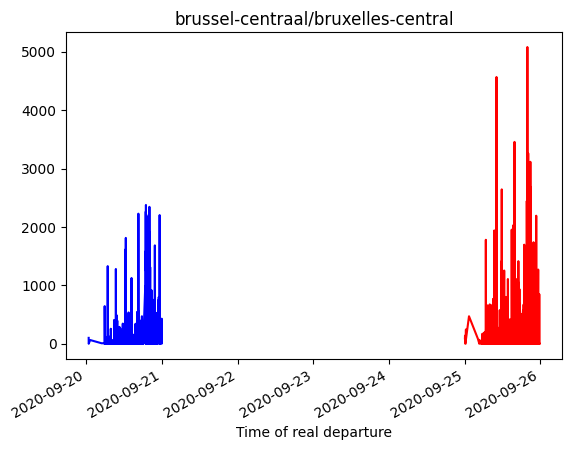

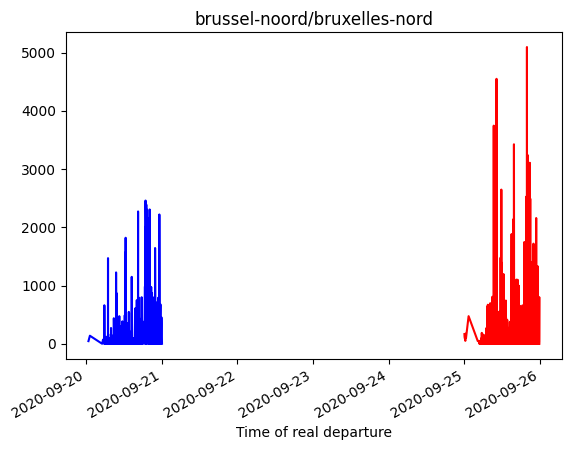

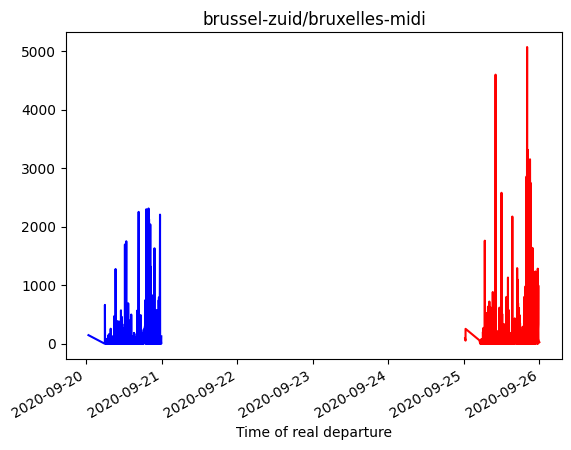

In [13]:
for station in trips["Name of the stop"].unique():
    fig, ax = plt.subplots()
    trips[(trips["Name of the stop"] == station) & (trips["Time of real arrival"].dt.date == pd.to_datetime("2020-09-20").date())].groupby("Time of real departure")["Delay time"].mean().plot(ax=ax, color="blue")
    trips[(trips["Name of the stop"] == station) & (trips["Time of real arrival"].dt.date == pd.to_datetime("2020-09-25").date())].groupby("Time of real departure")["Delay time"].mean().plot(ax=ax, color="red")
    plt.title(station)
    plt.show()